# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# [1]. Reading Data

## [1.1] Loading the data

The dataset is available in two forms
1. .csv file
2. SQLite Database

In order to load the data, We have used the SQLITE dataset as it is easier to query the data and visualise the data efficiently.
<br> 

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score is above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [2]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            # Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 4.9MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1rPupavaoY_D5F-DDZLHatHqH8MCal0yo' # The shareable link # The shareable link

In [4]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1rPupavaoY_D5F-DDZLHatHqH8MCal0yo


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 

downloaded.GetContentFile('mydata.csv')  
df3 = pd.read_csv('mydata.csv')

In [6]:
df3.head(5)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [0]:
def func(x):
  if x>3:
    return 1
  else:
    return 0

In [0]:

df3['Score']=df3['Score'].apply(func)

In [0]:
datapos=df3[df3.Score==1]
dataneg=df3[df3.Score==0]
datapos=datapos.sample(frac=0.06)
dataneg=dataneg.sample(frac=0.2)
df3=pd.concat([datapos,dataneg])

In [10]:
print(datapos.shape)
print(dataneg.shape)
print(df3.shape)


(5033, 11)
(3225, 11)
(8258, 11)


In [0]:
# using SQLite Table to read data.
con = sqlite3.connect('database.sqlite') 

# filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
# SELECT * FROM Reviews WHERE Score != 3 LIMIT 500000, will give top 500000 data points
# you can change the number to any other number based on your computing power

# filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 LIMIT 500000""", con) 
# for tsne assignment you can take 5k data points

filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 LIMIT 5000""", con) 

# Give reviews with Score>3 a positive rating(1), and reviews with a score<3 a negative rating(0).
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)

In [0]:
display = pd.read_sql_query("""
SELECT UserId, ProductId, ProfileName, Time, Score, Text, COUNT(*)
FROM Reviews
GROUP BY UserId
HAVING COUNT(*)>1
""", con)

In [0]:
|print(display.shape)
display.head()

In [0]:
display['COUNT(*)'].sum()

#  [2] Exploratory Data Analysis

## [2.1] Data Cleaning: Deduplication

It is observed (as shown in the table below) that the reviews data had many duplicate entries. Hence it was necessary to remove duplicates in order to get unbiased results for the analysis of the data.  Following is an example:

In [0]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND UserId="AR5J8UI46CURR"
ORDER BY ProductID
""", con)
display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


As it can be seen above that same user has multiple reviews with same values for HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary and Text and on doing analysis it was found that <br>
<br> 
ProductId=B000HDOPZG was Loacker Quadratini Vanilla Wafer Cookies, 8.82-Ounce Packages (Pack of 8)<br>
<br> 
ProductId=B000HDL1RQ was Loacker Quadratini Lemon Wafer Cookies, 8.82-Ounce Packages (Pack of 8) and so on<br>

It was inferred after analysis that reviews with same parameters other than ProductId belonged to the same product just having different flavour or quantity. Hence in order to reduce redundancy it was decided to eliminate the rows having same parameters.<br>

The method used for the same was that we first sort the data according to ProductId and then just keep the first similar product review and delelte the others. for eg. in the above just the review for ProductId=B000HDL1RQ remains. This method ensures that there is only one representative for each product and deduplication without sorting would lead to possibility of different representatives still existing for the same product.

In [0]:
filtered_data=df3

In [0]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [15]:
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(8112, 11)

In [16]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

98.23201743763623

<b>Observation:-</b> It was also seen that in two rows given below the value of HelpfulnessNumerator is greater than HelpfulnessDenominator which is not practically possible hence these two rows too are removed from calcualtions

In [0]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND Id=44737 OR Id=64422
ORDER BY ProductID
""", con)

display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
1,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [0]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [18]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(8112, 11)


1    4986
0    3126
Name: Score, dtype: int64

#  [3] Preprocessing

## [3.1].  Preprocessing Review Text

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative reviews

In [20]:
# printing some random reviews
sent_0 = final['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = final['Text'].values[1000]
print(sent_1000)
print("="*50)

sent_1500 = final['Text'].values[1500]
print(sent_1500)
print("="*50)

sent_4900 = final['Text'].values[4900]
print(sent_4900)
print("="*50)

My dogs loves this chicken but its a product from China, so we wont be buying it anymore.  Its very hard to find any chicken products made in the USA but they are out there, but this one isnt.  Its too bad too because its a good product but I wont take any chances till they know what is going on with the china imports.
Love the taste, but at least half of the crackers in every package were shattered.
This has become a family favorite side dish. You can use it as is, but it's even better when you gussy it up a little. We like broccoli and parmesan. Cook fresh broccoli flowers right in it or on top of it for the last 10 min. add spice sack and parmesan.
If you like flavored coffee, this is a must have.  The aroma is only topped by the taste.  I will always have this coffee on hand.


In [21]:
# remove urls from text python: https://stackoverflow.com/a/40823105/4084039
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_1000 = re.sub(r"http\S+", "", sent_1000)
sent_150 = re.sub(r"http\S+", "", sent_1500)
sent_4900 = re.sub(r"http\S+", "", sent_4900)

print(sent_0)

My dogs loves this chicken but its a product from China, so we wont be buying it anymore.  Its very hard to find any chicken products made in the USA but they are out there, but this one isnt.  Its too bad too because its a good product but I wont take any chances till they know what is going on with the china imports.


In [22]:
# https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
from bs4 import BeautifulSoup

soup = BeautifulSoup(sent_0, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1000, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1500, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_4900, 'lxml')
text = soup.get_text()
print(text)

My dogs loves this chicken but its a product from China, so we wont be buying it anymore.  Its very hard to find any chicken products made in the USA but they are out there, but this one isnt.  Its too bad too because its a good product but I wont take any chances till they know what is going on with the china imports.
Love the taste, but at least half of the crackers in every package were shattered.
This has become a family favorite side dish. You can use it as is, but it's even better when you gussy it up a little. We like broccoli and parmesan. Cook fresh broccoli flowers right in it or on top of it for the last 10 min. add spice sack and parmesan.
If you like flavored coffee, this is a must have.  The aroma is only topped by the taste.  I will always have this coffee on hand.


In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [24]:
sent_1500 = decontracted(sent_1500)
print(sent_1500)
print("="*50)

This has become a family favorite side dish. You can use it as is, but it is even better when you gussy it up a little. We like broccoli and parmesan. Cook fresh broccoli flowers right in it or on top of it for the last 10 min. add spice sack and parmesan.


In [25]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

My dogs loves this chicken but its a product from China, so we wont be buying it anymore.  Its very hard to find any chicken products made in the USA but they are out there, but this one isnt.  Its too bad too because its a good product but I wont take any chances till they know what is going on with the china imports.


In [26]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_1500 = re.sub('[^A-Za-z0-9]+', ' ', sent_1500)
print(sent_1500)

This has become a family favorite side dish You can use it as is but it is even better when you gussy it up a little We like broccoli and parmesan Cook fresh broccoli flowers right in it or on top of it for the last 10 min add spice sack and parmesan 


In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [28]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 8112/8112 [00:03<00:00, 2494.46it/s]


In [29]:
preprocessed_reviews[1500]

'become family favorite side dish use even better gussy little like broccoli parmesan cook fresh broccoli flowers right top last min add spice sack parmesan'

<h2><font color='red'>[3.2] Preprocessing Review Summary</font></h2>

In [0]:
final.head(5)
y=final['Score']

# [4] Featurization

## [4.1] BAG OF WORDS

In [31]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_reviews)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa', 'aaaa', 'ab', 'abandon', 'abandoned', 'abandoning', 'abc', 'abd', 'abdomen', 'abdominal']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (8112, 18239)
the number of unique words  18239


## [4.2] Bi-Grams and n-Grams.

In [32]:
#bi-gram, tri-gram and n-gram

#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# you can choose these numebrs min_df=10, max_features=5000, of your choice
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
final_bigram_counts = count_vect.fit_transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (8112, 5000)
the number of unique words including both unigrams and bigrams  5000


## [4.3] TF-IDF

In [37]:
tfidfvect = TfidfVectorizer()
finaltfidf=tfidfvect.fit_transform(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tfidfvect.get_feature_names()[0:10])
print('='*50)



some sample features(unique words in the corpus) ['aa', 'aaaa', 'ab', 'abandon', 'abandoned', 'abandoning', 'abc', 'abd', 'abdomen', 'abdominal']


## [4.4] Word2Vec

In [0]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in preprocessed_reviews:
    list_of_sentance.append(sentance.split())

In [0]:
# Using Google News Word2Vectors

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.


# http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W17SRFAzZPY
# you can comment this whole cell
# or change these varible according to your need

is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")

[('snack', 0.9951335191726685), ('calorie', 0.9946465492248535), ('wonderful', 0.9946032166481018), ('excellent', 0.9944332838058472), ('especially', 0.9941144585609436), ('baked', 0.9940600395202637), ('salted', 0.994047224521637), ('alternative', 0.9937226176261902), ('tasty', 0.9936816692352295), ('healthy', 0.9936649799346924)]
[('varieties', 0.9994194507598877), ('become', 0.9992934465408325), ('popcorn', 0.9992750883102417), ('de', 0.9992610216140747), ('miss', 0.9992451071739197), ('melitta', 0.999218761920929), ('choice', 0.9992102384567261), ('american', 0.9991837739944458), ('beef', 0.9991780519485474), ('finish', 0.9991567134857178)]


In [0]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  3817
sample words  ['product', 'available', 'course', 'total', 'pretty', 'stinky', 'right', 'nearby', 'used', 'ca', 'not', 'beat', 'great', 'received', 'shipment', 'could', 'hardly', 'wait', 'try', 'love', 'call', 'instead', 'removed', 'easily', 'daughter', 'designed', 'printed', 'use', 'car', 'windows', 'beautifully', 'shop', 'program', 'going', 'lot', 'fun', 'everywhere', 'like', 'tv', 'computer', 'really', 'good', 'idea', 'final', 'outstanding', 'window', 'everybody', 'asks', 'bought', 'made']


## [4.4.1] Converting text into vectors using Avg W2V, TFIDF-W2V

#### [4.4.1.1] Avg W2v

In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████████| 4986/4986 [00:03<00:00, 1330.47it/s]


4986
50


#### [4.4.1.2] TFIDF weighted W2v

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(preprocessed_reviews)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [0]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|█████████████████████████████████████████████████████████████████████████████| 4986/4986 [00:20<00:00, 245.63it/s]


# [5] Assignment 11: Truncated SVD

<ol>
    <li><strong>Apply Truncated-SVD on only this feature set:</strong>
        <ul>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
    <br>
    <li><strong>Procedure:</strong>
        <ul>
    <li>Take top 2000 or 3000 features from tf-idf vectorizers using idf_ score.</li>
    <li>You need to calculate the co-occurrence matrix with the selected features (Note: X.X^T
doesn’t give the co-occurrence matrix, it returns the covariance matrix, check these
        bolgs <a href='https://medium.com/data-science-group-iitr/word-embedding-2d05d270b285'>blog-1,</a> <a href='https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/'>blog-2 </a>for more information)</li>
            <li>You should choose the n_components in truncated svd, with maximum explained
variance. Please search on how to choose that and implement them. (hint: plot of
cumulative explained variance ratio)</li>
            <li>After you are done with the truncated svd, you can apply K-Means clustering and choose
the best number of clusters based on elbow method.</li>
            <li> Print out wordclouds for each cluster, similar to that in previous assignment. </li>
            <li>You need to write a function that takes a word and returns the most similar words using
cosine similarity between the vectors(vector: a row in the matrix after truncatedSVD)</li>
        </ul>
    </li>
    <br>
    
</ol>

## Truncated-SVD

### [5.1] Taking top features from TFIDF,<font color='red'> SET 2</font>

In [38]:
print(tfidfvect.get_feature_names())
features=tfidfvect.get_feature_names()
print(tfidfvect.idf_)

['aa', 'aaaa', 'ab', 'abandon', 'abandoned', 'abandoning', 'abc', 'abd', 'abdomen', 'abdominal', 'ability', 'abit', 'able', 'abnormal', 'abnormalities', 'abnormally', 'abomination', 'abominations', 'aboout', 'abosolutly', 'abosoutely', 'abot', 'abound', 'abroad', 'abrubt', 'abs', 'absence', 'absent', 'absolute', 'absolutelty', 'absolutely', 'absolutley', 'absolutly', 'absorb', 'absorbable', 'absorbant', 'absorbed', 'absorbic', 'absorbing', 'absorbs', 'absorption', 'absoulte', 'absurd', 'abuelita', 'abundance', 'abundant', 'abuse', 'abused', 'abusing', 'abusive', 'abut', 'abv', 'abysmally', 'acacia', 'academy', 'acai', 'accelerant', 'accents', 'accentuate', 'accept', 'acceptable', 'accepted', 'access', 'accessible', 'accessory', 'accident', 'accidental', 'accidentally', 'accidently', 'accidents', 'acclimate', 'acclimated', 'accommodate', 'accompainment', 'accompanied', 'accompanies', 'accompaniment', 'accompany', 'accompanying', 'accomplish', 'accomplished', 'accomplishes', 'accomplishm

In [39]:
sortedscore=np.argsort(tfidfvect.idf_)[:2000]
top2000words=[features[i] for i in sortedscore]
print(top2000words[:5])

['not', 'like', 'good', 'taste', 'would']


### [5.2] Calulation of Co-occurrence matrix

In [0]:
cooccurentmatrix=np.zeros((2000,2000)).astype(int)
for sent in preprocessed_reviews:
    words = sent.split()
    for index,word in enumerate(words):
        if word in top2000words:
          lower=max(index-5,0)
          upper=min(index+5,len(words)-1)
          for j in range(lower,upper+ 1):
             if words[j] in top2000words:
                cooccurentmatrix[top2000words.index(word),top2000words.index(words[j])] += 1
                

In [78]:
cooccurentmatrix

array([[12258,  1572,   900, ...,     5,     7,    10],
       [ 1572,  4366,   289, ...,     1,     3,     0],
       [  900,   289,  2928, ...,     7,     3,     2],
       ...,
       [    5,     1,     7, ...,    21,     0,     0],
       [    7,     3,     3, ...,     0,    41,     0],
       [   10,     0,     2, ...,     0,     0,    20]])

### [5.3] Finding optimal value for number of components (n) to be retained.

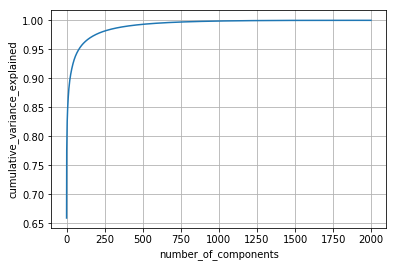

In [79]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=1999)
svddata=svd.fit_transform(cooccurencematrix)
varianceexplained=svd.explained_variance_/np.sum(svd.explained_variance_)
cumulativevarianceexplaned=np.cumsum(varianceexplained)
plt.plot(cumulativevarianceexplaned)
plt.grid()
plt.xlabel('number_of_components')
plt.ylabel('cumulative_variance_explained')
plt.show()

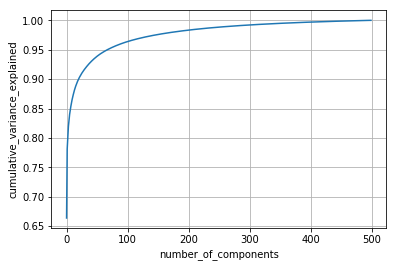

In [80]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=500)
svddata=svd.fit_transform(cooccurencematrix)
varianceexplained=svd.explained_variance_/np.sum(svd.explained_variance_)
cumulativevarianceexplaned=np.cumsum(varianceexplained)
plt.plot(cumulativevarianceexplaned)
plt.grid()
plt.xlabel('number_of_components')
plt.ylabel('cumulative_variance_explained')
plt.show()

##CONSIDERING 300 COMPONENTS

### [5.4] Applying k-means clustering

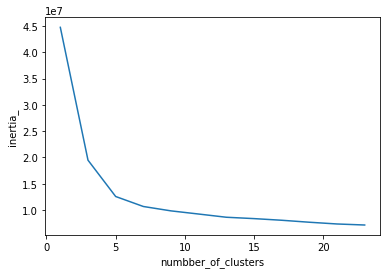

In [81]:
cluster=[i for i in range(1,25,2)]
from sklearn.cluster import KMeans
l1=[]
l2=[]
for i in cluster:
  l1.append(i)
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(svddata)
  l2.append(kmeans.inertia_)
plt.plot(l1,l2)
plt.xlabel('numbber_of_clusters')
plt.ylabel('inertia_')
plt.show()

#CONSIDERING 3 CLUSTERS

### [5.5] Wordclouds of clusters obtained in the above section

In [0]:
print(svddata.shape)

(2000, 500)


In [0]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(svddata)
out=kmeans.predict(svddata)


In [0]:
print(len(out))

2000


In [0]:
wordsofcluster1=[]
wordsofcluster2=[]
wordsofcluster3=[]
for i in range(len(out)):
  if out[i]==0:
    wordsofcluster1.append(top2000words[i])
  elif out[i]==1:
    wordsofcluster2.append(top2000words[i])
  elif out[i]==2:
    wordsofcluster3.append(top2000words[i])
 

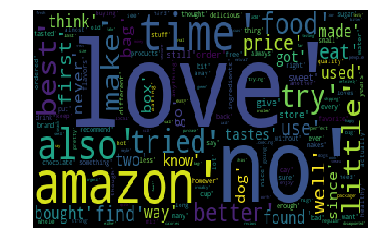

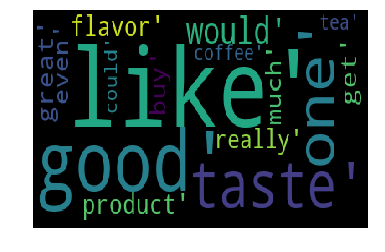

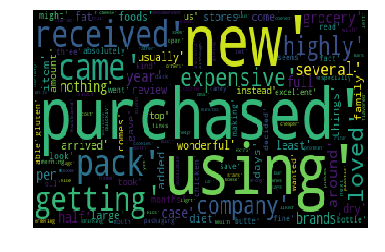

In [0]:

from wordcloud import WordCloud
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt1
word_cloud = WordCloud(relative_scaling = 1.0).generate(str(wordsofcluster1))
plt.imshow(word_cloud,aspect='auto')
plt.axis('off')
plt.show()
word_cloud = WordCloud(relative_scaling = 1.0).generate(str(wordsofcluster2))
plt.imshow(word_cloud,aspect='auto')
plt.axis('off')
plt.show()
word_cloud = WordCloud(relative_scaling = 1.0).generate(str(wordsofcluster3))
plt.imshow(word_cloud,aspect='auto')
plt.axis('off')
plt.show()


### [5.6] Function that returns most similar words for a given word.

In [83]:
print(top2000words)

['not', 'like', 'good', 'taste', 'would', 'one', 'product', 'great', 'flavor', 'love', 'no', 'get', 'really', 'much', 'even', 'amazon', 'time', 'tried', 'also', 'coffee', 'buy', 'food', 'little', 'price', 'better', 'try', 'well', 'use', 'make', 'best', 'find', 'first', 'bought', 'could', 'eat', 'tea', 'found', 'used', 'made', 'two', 'way', 'think', 'tastes', 'bag', 'know', 'go', 'order', 'box', 'dog', 'store', 'recommend', 'give', 'got', 'never', 'still', 'something', 'water', 'since', 'sugar', 'drink', 'cup', 'want', 'sweet', 'day', 'free', 'bad', 'ever', 'many', 'brand', 'bit', 'say', 'thought', 'favorite', 'chocolate', 'however', 'delicious', 'nice', 'every', 'flavors', 'ordered', 'years', 'different', 'loves', 'old', 'stuff', 'makes', 'less', 'small', 'back', 'lot', 'sure', 'ingredients', 'right', 'without', 'hard', 'buying', 'quality', 'eating', 'enough', 'add', 'tasted', 'another', 'products', 'though', 'mix', 'dogs', 'fresh', 'high', 'using', 'strong', 'see', 'thing', 'looking',

In [84]:
from sklearn.metrics.pairwise import cosine_similarity
def similarword(word):
  similar=cosine_similarity(cooccurencematrix)
  simi=np.argsort(similar[top2000words.index(word)])[::-1][:10]
  l=[top2000words[i] for i in simi]
  print(l)
  
similarword('love')  

['love', 'good', 'also', 'well', 'however', 'no', 'great', 'enjoy', 'used', 'delicious']


In [85]:
similarword('sealed')

['sealed', 'open', 'inside', 'opened', 'plastic', 'air', 'package', 'bag', 'box', 'put']


In [86]:
similarword('not')

['not', 'little', 'seems', 'actually', 'never', 'no', 'great', 'better', 'makes', 'wonderful']


In [87]:
similarword('delight')

['delight', 'delicious', 'flavor', 'perfect', 'love', 'enjoy', 'lover', 'makes', 'good', 'well']


In [88]:
similarword('damaged')

['damaged', 'dented', 'received', 'badly', 'ordered', 'order', 'purchase', 'purchased', 'description', 'packaging']


# [6] Conclusions

# DOCUMENTATION CONCLUSION AND KEYTAKEAWAYS
## WE PERFORMED THE TRUNCATED SVD OVER THE AMAZON FOOD REVIEWS.
### AFTER PREPROCESSING THE AMAZON REVIEWS WE PERFORM THE TFDIF ENCODING OVER THE REVIEWS .WE HAVE SELECTED THE 2000 FEATURES BASED ON THE IDF SCORES.
### WE CALCULATE THE COOCCURENCE MATRIX OVER THESE 2000 FEATURES .COOCCURENCE MATRIX IS NOTHING BUT THE 2 FEATURES WHICH ARE WORDS SIMULATEANEOUSLY IN A BOUNDARY OF REVIEWPARSING ALL THE REVIEWS.
###WE PERFORM THE TRUNCATED SVD OVER ALL THE COMPONENTS AND PLOT HTE VARAINCE EXPALINED OVER THE COMPONENTS.
### WE FIX THE COMPONENTS AS THE NUMBER OF COMPONENTS THAT EXPLAINS 95 PERCENT VARIANCE.
### WE PERFORM THE HYPERPARAMETER TUNING OVER THE NUMBER OF CLUSTERS AND WE PLOT THE INERTIA FORM THE CLUSTER VS THE NUMER OF CLUSTERS.
### BASED ON THE PLOT WE OBTAIN THE NUMBER OF CLUSTERS. WE CONSIDER THE NUMBER OF CLUSTERS AS 3.
### FROM THE PLOT AFTER PERFORMING THE HYPERPARAMETER TUNING FROM THE CLUSTER3 WE CAN VISUALISE  THE GRAPH ELBOW POINT IS OCCURING AT 3.
### AS 3 CLUSTERS USING KMEANS WE TAKE THE 3 CLUSTERS AND PLOT THE WORDCLIOUDS FOR THE 3 CLUSTERS AND ANALYSE THE WORDCLOUD.

##ANALYSING THE WORDCLOUD
### IN THE CLUSTER1 WE GOT WORDS LIKR TIME,PRICE,EAT,LITTLE,BOUGHT WE GOT DETAILS RELATED TO PRODUCT ABOUT BUYING THE PRODUCT ETC...
### IF WE ANALYSE THE CLUSTER2 WE GOT WORDS LIKE GREAT,LIKE ,GOOD,TASTE,FLAVOR,TEA  WE GOT WORDS THAT ARE POSITIVE AND GOOD LIKE GOODTHINGS.
### IF WE ANALYSE THE CLUSTER3 WE OBTAINED WORDS LIKE PURCHASED,PACK,RECEIVED,GETTING,CAME,SEVERAL WHICHA RE RELATED TO THE PACKAGING OF THE PRODUCT.
###WE HAVE ALSO WRITTEN THE FUNTION TO FINGD THE SIMILAR WORD WHICH WAS EXTREEMELY GOOD WE HAVE DONE IT BASED ON THE COSINE SIMILARITY.
### IF WE OBSERVE THE SIMILAR WORDS TO LOVE ARE 'love', 'good', 'also', 'well', 'however', 'no', 'great', 'enjoy'ETC..
### IF WE OBSERVE THE SIMILAR WORDS TO NOT ARE 'not', 'little', 'seems', 'actually', 'never', 'no', ETC..
### IF WE OBSERVE THE SIMILAR WORDS TO DELIGHT ARE delicious', 'flavor', 'perfect', 'love', ETC..
### IF WE OBSERVE THE SIMILAR WORDS TO SEALED ARE SEALED,OPEN,PLASTIC,INSIDE ETC...
### THESE WORD ENMBEDDING PERFORMED EXTREEMELY WE LL  AND OBTAINED THE WORDS THAT ARE REALLY SIMILAR.